### Implementation of K-means clustering algorithm
This works shows the implementation of k-means clustering from scratch.
Using numpy for vectorized calculation
csv to read in our file
matpplotlib to visualize the results 

step1 import libraries

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

read in our file and find out how many clusters are needed :)

In [2]:
def file_reader():
    file = open(r"k.csv")
    reader = csv.reader(file)
    data = list(reader)
    file.close()
    return data
data = np.asarray(file_reader(), dtype=float)
print(data.shape)
k = int(input('enter number of clusters: ') )# number of clusters


(100, 2)
enter number of clusters: 4


Randomize initial centroids

In [4]:
def randomize_centroids(data, centroids, k):
    for cluster in range(0, k):
        centroids.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())
        # print('Initial_centroids',centroids)
    return centroids


helper method to let us know if the clusters have converged

In [5]:
def has_converged(centroids, old_centroids, iterations):
    MAX_ITERATIONS = 1000
    if iterations > MAX_ITERATIONS:
        return True
    return old_centroids == centroids

Method for calculating euclidean distance between data points with respect to available centroids

![euclidean_distance](ed0.png "euclidean distance")

In [6]:
def euclidean_dist(data, centroids, clusters):
    for instance in data:
        # Find which centroid is the closest
        # to the given data point.
        # print('instance',instance)
        # print('centroids',centroids)
        mu_index = min([(i[0], np.linalg.norm(instance-centroids[i[0]])) \
                            for i in enumerate(centroids)], key=lambda t:t[1])[0]
        try:
            clusters[mu_index].append(instance)
        except KeyError:
            clusters[mu_index] = [instance]

    # If any cluster is empty then assign one point
    # from data set randomly so as to not have empty
    # clusters and 0 means.
    for cluster in clusters:
        if not cluster:
            cluster.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())

    return clusters

Final pipeline to categorize our data

In [7]:
def kmeans(data, k):

    centroids = []
    centroids = randomize_centroids(data, centroids, k)

    old_centroids = [[] for i in range(k)]
    iterations = 0
    while not (has_converged(centroids, old_centroids, iterations)):
        iterations += 1

        clusters = [[] for i in range(k)]

        # assign data points to clusters
        clusters = euclidean_dist(data, centroids, clusters)

        # recalculate centroids
        index = 0
        for cluster in clusters:
            old_centroids[index] = centroids[index]
            centroids[index] = np.mean(cluster, axis=0).tolist()
            index += 1
            # print('oldcenroids' + str(old_centroids))
    centroids = np.asarray(centroids,dtype=float)
    print("The total number of data data-points is: " + str(len(data)))
    print("The total number of iterations necessary is: " + str(iterations))
    print("The means of each cluster are: " + str(centroids))
    print("\n The clusters are as follows:\n")
    for cluster in clusters:
        print (cluster)
    return centroids


run the method

In [8]:
centroids = kmeans(data,k)

The total number of data data-points is: 100
The total number of iterations necessary is: 6
The means of each cluster are: [[41.7        42.9       ]
 [47.25925926 85.96296296]
 [84.33333333 43.6       ]
 [79.         83.26086957]]

 The clusters are as follows:

[array([52., 47.]), array([53., 26.]), array([25., 36.]), array([45., 49.]), array([41., 36.]), array([51., 43.]), array([36., 61.]), array([54., 51.]), array([43., 41.]), array([26., 49.]), array([30., 48.]), array([37., 59.]), array([33., 28.]), array([37., 51.]), array([50., 53.]), array([29., 28.]), array([54., 61.]), array([34., 33.]), array([56., 29.]), array([48., 29.])]
[array([ 29., 100.]), array([48., 97.]), array([49., 97.]), array([44., 74.]), array([45., 66.]), array([47., 81.]), array([46., 97.]), array([54., 79.]), array([40., 98.]), array([43., 90.]), array([57., 94.]), array([36., 89.]), array([59., 70.]), array([54., 88.]), array([61., 89.]), array([51., 97.]), array([48., 98.]), array([40., 92.]), array([46.

plot the results

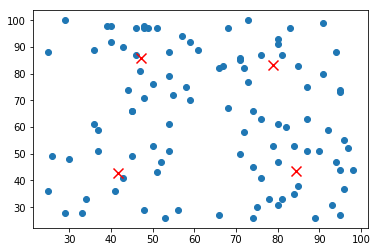

In [9]:
fig = plt.figure()
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)

cent_x = centroids [:,0]
cent_y = centroids [:,1]
plt.scatter(cent_x,cent_y,s=100,marker='x',c='r')

plt.show()